In [64]:
import csv
import pandas as pd
import matplotlib.pyplot as mat
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.plotly as py
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import *
from math import sqrt
from sklearn.base import TransformerMixin
from sklearn.grid_search import GridSearchCV
init_notebook_mode(connected=True)

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

F:\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



## Importing Data

In [4]:
full_data = pd.read_csv('FIFA18v2.csv')
full_data.head(10)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Reactions,Short Passing,Shot Power,Sliding Tackle,Sprint Speed,Stamina,Standing Tackle,Strength,Vision,Volleys
0,L. Messi,30,https://cdn.sofifa.org/sm/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/xs/18/teams/241.png,118500000,...,95,88,85,26,87,73,28,59,92,86
1,Cristiano Ronaldo,32,https://cdn.sofifa.org/sm/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/xs/18/teams/243.png,95500000,...,96,83,94,23,91,92,31,80,85,88
2,Neymar,25,https://cdn.sofifa.org/sm/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/xs/18/teams/73.png,119500000,...,88,82,80,33,90,78,24,53,83,83
3,L. Suárez,30,https://cdn.sofifa.org/sm/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/xs/18/teams/241.png,97000000,...,93,83,87,38,77,89,45,83,84,88
4,M. Neuer,31,https://cdn.sofifa.org/sm/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/xs/18/teams/21.png,61000000,...,85,55,25,11,60,43,10,83,70,11
5,De Gea,26,https://cdn.sofifa.org/sm/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/xs/18/teams/11.png,74500000,...,90,50,31,13,58,40,21,64,68,13
6,K. De Bruyne,26,https://cdn.sofifa.org/sm/18/players/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/xs/18/teams/10.png,104500000,...,90,91,89,51,76,88,58,73,92,82
7,R. Lewandowski,28,https://cdn.sofifa.org/sm/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/xs/18/teams/21.png,92000000,...,91,85,88,19,79,79,42,84,78,89
8,E. Hazard,26,https://cdn.sofifa.org/sm/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/xs/18/teams/5.png,95500000,...,87,89,79,22,88,81,27,67,89,80
9,T. Kroos,27,https://cdn.sofifa.org/sm/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/xs/18/teams/243.png,79000000,...,89,90,87,69,66,77,82,74,88,82


## Checking for Null values

As we can see from the result, total there are 18000 rows and for majority of the columns there are no null values for any rows. These are the columns which I am going to use for my analysis. The only column that contains null values is least important to my analysis. However, we will try to impute it later

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 46 columns):
Name                18000 non-null object
Age                 18000 non-null int64
Photo               18000 non-null object
Nationality         18000 non-null object
Flag                18000 non-null object
Overall             18000 non-null int64
Potential           18000 non-null int64
Club                17755 non-null object
Club Logo           18000 non-null object
Value               18000 non-null int64
Wage                18000 non-null int64
Special             18000 non-null int64
Acceleration        18000 non-null int64
Aggression          18000 non-null int64
Agility             18000 non-null int64
Balance             18000 non-null int64
Ball Control        18000 non-null int64
Composure           18000 non-null int64
Crossing            18000 non-null int64
Curve               18000 non-null int64
Dribbling           18000 non-null int64
FK Accuracy         1800

## Summary Statistics

By calling describe function on the dataframe I get the following summary statistics of all the integer value columns. Some important outcomes from the output:
- Age: average age of players in FIFA 18 is 24.738, which is quite young. 
- Overall: overall is the final rating given to each player after considering all the skills and attributes. Average is just 66.354 which indicates that highly skilled players are handful.

**Also, as you can see that the data is pretty clean and there are no inappropriate values like Age or Overall or any attributes less than 0 or greater than 100**

In [6]:
full_data.describe()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,Reactions,Short Passing,Shot Power,Sliding Tackle,Sprint Speed,Stamina,Standing Tackle,Strength,Vision,Volleys
count,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,24.738000,66.354667,71.333833,2.429048e+06,11615.000000,1596.806667,64.982222,55.964389,63.232611,63.925778,...,61.832944,58.587667,55.724222,45.641222,65.216056,63.457611,47.594667,65.131778,53.268389,43.120000
std,4.675434,6.857586,6.037602,5.526831e+06,23380.462637,273.037974,14.862345,17.502924,14.713156,13.999942,...,9.068930,14.801548,17.292323,21.469619,14.562499,15.724501,21.836913,12.548101,14.275535,17.726504
min,16.000000,49.000000,50.000000,0.000000e+00,0.000000,746.000000,11.000000,11.000000,14.000000,11.000000,...,24.000000,11.000000,3.000000,5.000000,12.000000,13.000000,6.000000,21.000000,10.000000,4.000000
25%,21.000000,62.000000,67.000000,3.250000e+05,2000.000000,1455.000000,58.000000,44.000000,55.000000,56.000000,...,56.000000,53.000000,46.000000,24.000000,58.000000,57.000000,26.000000,58.000000,44.000000,30.000000
50%,24.000000,66.000000,71.000000,7.000000e+05,4000.000000,1636.000000,68.000000,59.000000,65.000000,66.000000,...,62.000000,62.000000,59.000000,52.000000,68.000000,66.000000,55.000000,66.000000,55.000000,44.000000
75%,28.000000,71.000000,75.000000,2.100000e+06,12000.000000,1786.000000,75.000000,70.000000,74.000000,74.000000,...,68.000000,68.000000,68.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,44.000000,94.000000,94.000000,1.195000e+08,565000.000000,2321.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,90.000000


## Imputing the Data

Below, I wrote a small class which takes the whole DataFrame as input and imputes any categorical values with strategy 'most_frequent' and imputes any integer values with the mean of that column

In [7]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.
        """
    
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

**As you can see that, the column 'Club' which had null values is now imputed with the most frequent occurences of similar values.**

In [70]:
full_data = DataFrameImputer().fit_transform(full_data)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 43 columns):
Name                18000 non-null object
Age                 18000 non-null int64
Nationality         18000 non-null object
Overall             18000 non-null int64
Potential           18000 non-null int64
Club                18000 non-null object
Value               18000 non-null int64
Wage                18000 non-null int64
Special             18000 non-null int64
Acceleration        18000 non-null int64
Aggression          18000 non-null int64
Agility             18000 non-null int64
Balance             18000 non-null int64
Ball Control        18000 non-null int64
Composure           18000 non-null int64
Crossing            18000 non-null int64
Curve               18000 non-null int64
Dribbling           18000 non-null int64
FK Accuracy         18000 non-null int64
Finishing           18000 non-null int64
GK Diving           18000 non-null int64
GK Handling         18000 n

## Dropping unnecessary columns

3 of the columns in the dataset had links to jpg files which were totally irrelevant for EDA and analysis. Hence dropping them

In [10]:
full_data = full_data.drop('Photo', 1)
full_data = full_data.drop('Flag', 1)
full_data = full_data.drop('Club Logo', 1)
full_data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Reactions,Short Passing,Shot Power,Sliding Tackle,Sprint Speed,Stamina,Standing Tackle,Strength,Vision,Volleys
0,L. Messi,30,Argentina,94,94,FC Barcelona,118500000,565000,2161,92,...,95,88,85,26,87,73,28,59,92,86
1,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000,565000,2228,89,...,96,83,94,23,91,92,31,80,85,88
2,Neymar,25,Brazil,92,93,Paris Saint-Germain,119500000,280000,2105,94,...,88,82,80,33,90,78,24,53,83,83
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000,510000,2321,88,...,93,83,87,38,77,89,45,83,84,88
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000,230000,1487,56,...,85,55,25,11,60,43,10,83,70,11
5,De Gea,26,Spain,91,93,Manchester United,74500000,295000,1465,57,...,90,50,31,13,58,40,21,64,68,13
6,K. De Bruyne,26,Belgium,91,92,Manchester City,104500000,395000,2234,78,...,90,91,89,51,76,88,58,73,92,82
7,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000,355000,2151,79,...,91,85,88,19,79,79,42,84,78,89
8,E. Hazard,26,Belgium,91,91,Chelsea,95500000,405000,2122,93,...,87,89,79,22,88,81,27,67,89,80
9,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000,340000,2189,65,...,89,90,87,69,66,77,82,74,88,82



Here, I am just creating a subset of the dataset with columns like Name, Nationality, Age, Club, Ranking and the player's transfer value

In [11]:
newdf = full_data[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value']]
newdf.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value
0,L. Messi,30,Argentina,94,94,FC Barcelona,118500000
1,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000
2,Neymar,25,Brazil,92,93,Paris Saint-Germain,119500000
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000
5,De Gea,26,Spain,91,93,Manchester United,74500000
6,K. De Bruyne,26,Belgium,91,92,Manchester City,104500000
7,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000
8,E. Hazard,26,Belgium,91,91,Chelsea,95500000
9,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000


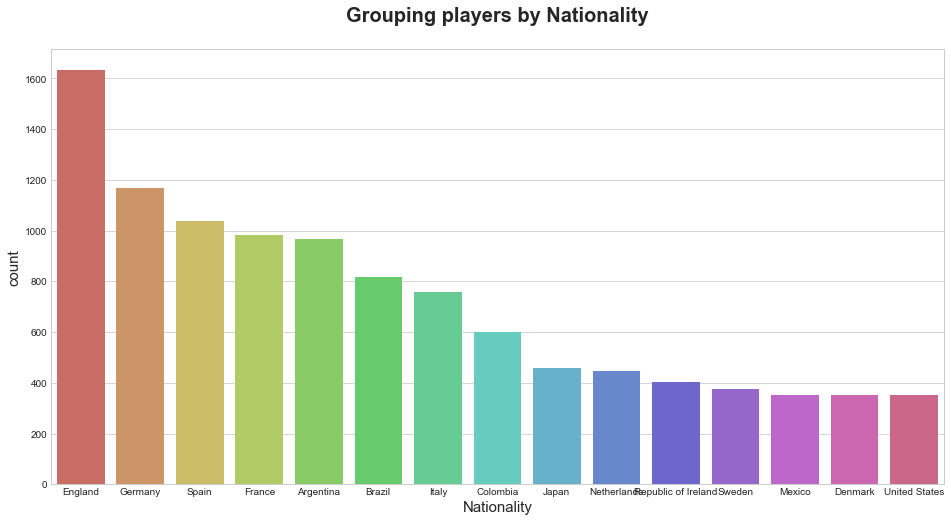

In [12]:
mat.figure(figsize=(16,8))
sns.set_style("whitegrid")
mat.title('Grouping players by Nationality', fontsize=20, fontweight='bold', y=1.05,)
mat.xlabel('Number of players', fontsize=15)
mat.ylabel('Players Age', fontsize=15)
sns.countplot(x="Nationality", data=newdf,order = newdf['Nationality'].value_counts().head(15).index, palette="hls");
mat.show()

As evident from above graph, FIFA-18  has maximum players from england followed by germany and spain. One reason of this might be that FIFA-18 has many lower level england leagues where only local players play. 

Text(0.5,1,'Top players (Overall > 85)')

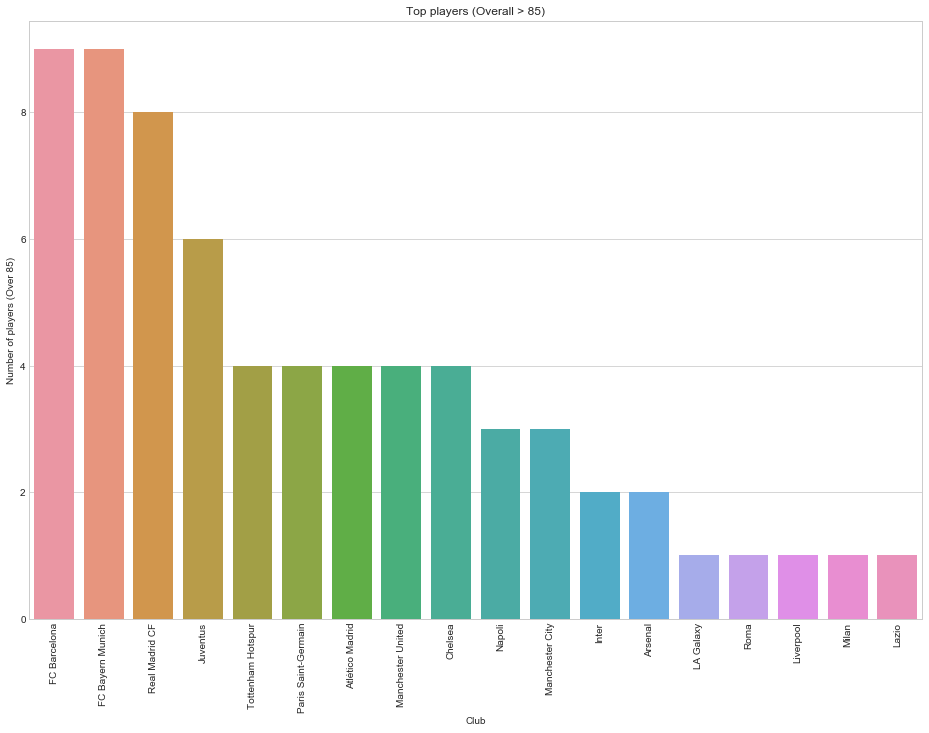

In [13]:
sns.mpl.rc("figure", figsize=(16,11))
counter = 85
players = newdf[newdf['Overall']>counter]
# Grouping the players by club
group = players.groupby('Club')
number_of_players = group.count()['Name'].sort_values(ascending=False)
ax = sns.countplot(x='Club', data=players, order=number_of_players.index)
ax.set_xticklabels(labels = number_of_players.index, rotation='vertical')
ax.set_ylabel('Number of players (Over 85)')
ax.set_xlabel('Club')
ax.set_title('Top players (Overall > %.i)' %counter)

Interesting analysis show Barcelona and Bayern Munich has highest number of top players i.e. player's overall higher than 85, Surprising fact here is chelsea have higher number of top players as compared to machester city.  

## Plotting data on world map

Here, I am plotting data for each country, this includes total number of players representing that country, Name of top 3 players and their overall rating.

In [17]:
def plot_geo(by_column, measure, sort_column, chart_title, min_rating = 0):
    df_g = full_data.copy()
    df_g = df_g[df_g['Overall']>min_rating]
    df_geo = df_g.groupby(['Nationality']).agg({by_column: measure})
    df_geo = pd.DataFrame(data = df_geo)
    df_geo = df_geo.rename(columns={by_column: 'Measurement'})
    df_geo['text'] = ''

    df_geo_player = full_data[['Nationality','Name', sort_column]].groupby(['Nationality']).head(3)
    df_geo_player = df_geo_player.sort_values(['Nationality', sort_column], ascending=[True, False])
    df_geo_player['Name_text'] = df_geo_player['Name'] + ' (' + df_geo_player[sort_column].map(str) + ')'

    for index, row in df_geo.iterrows():
        df_geo['text'].loc[index] = '<br>'.join(df_geo_player[df_geo_player['Nationality'] == index]['Name_text'].values)

    df_geo.rename(index={'England': 'United Kingdom'}, inplace = True)
    df_geo
    data = dict(type='choropleth', locations = df_geo.index, locationmode = 'country names', z = df_geo['Measurement'],
    text = df_geo['text'], colorbar = {'title':'Scale'},
    colorscale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']], reversescale = False)

    layout = dict(title = chart_title,geo = dict(showframe = True, showcoastlines = False, projection={'type':'mercator'}))

    choromap = dict(data = [data], layout = layout)
    iplot(choromap, validate=False, filename='world-map')

In [18]:
plot_geo('Nationality', 'count', 'Overall', 'Total number of players per nationality')

F:\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
attr_df = full_data[full_data.columns[12:46]]
cols = [col for col in attr_df.columns if col not in ['Name']]

## Comparing Graph of Multiple Players based on key attributes:

Here I have written a method that compares any number of players based on key attributes. This is a line plot with attributes on x-axis and ratings on y-axis.

In [23]:
def plotPlayerAbilities(name0, name1):
    trace0 = go.Scatter(x=cols, y=full_data[cols].loc[0], name=name0, line=dict(color=('rgb(205, 12, 24)'), width=2))
    trace1 = go.Scatter(x=cols, y=full_data[cols].loc[1], name=name1, line=dict(color=('rgb(22, 96, 167)'), width=2))
    layout = dict(title = 'Comparison of player attributes',
              xaxis = dict(title = 'Player Attributes'),
              yaxis = dict(title = 'Values'),
              )
    data = [trace0, trace1]
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='styled-line')

In [24]:
plotPlayerAbilities('L. Messi','L. Suárez')

## Wage/Value Vs Age

Text(0.5,1,'Average Age')

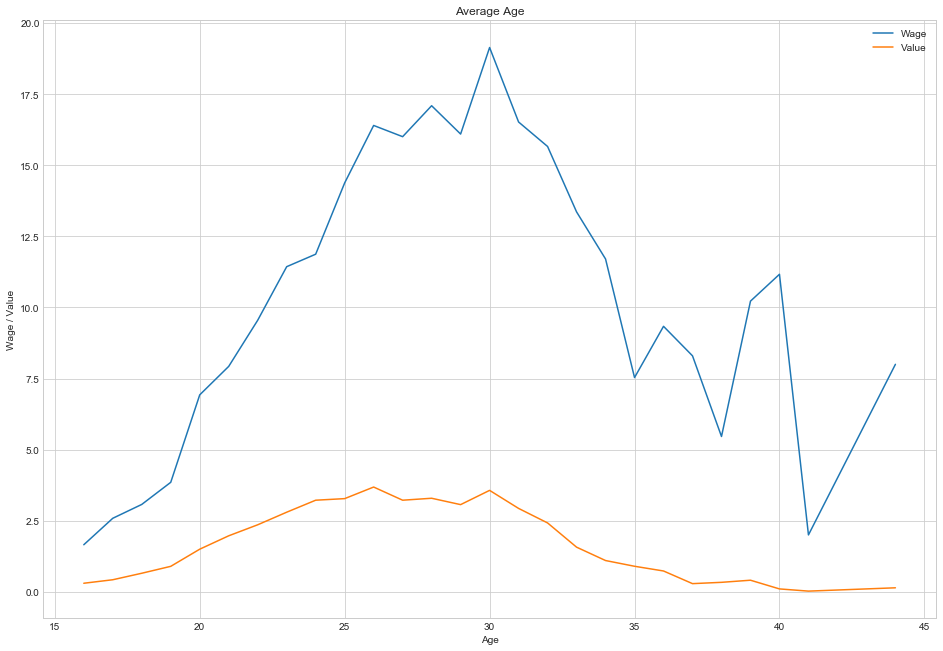

In [25]:
fifa_wage = full_data.groupby(['Age'])['Wage'].mean()
fifa_value = full_data.groupby(['Age'])['Value'].mean()
fifa_wage = fifa_wage.apply(lambda x: x/1000)
fifa_value = fifa_value.apply(lambda x: x/1000000)
summary = pd.concat([fifa_wage, fifa_value], axis=1)

axis = summary.plot()
axis.set_ylabel('Wage / Value')
axis.set_title('Average Age')

## How is Data Distributed ?

Showing how is data distributed using distplots of few key columns.

In [26]:
def plotDistribution(colName='Overall'):
    sns.set(); np.random.seed(0)
    x = pd.Series(full_data[colName], name=colName)
    ax = sns.distplot(x)

F:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



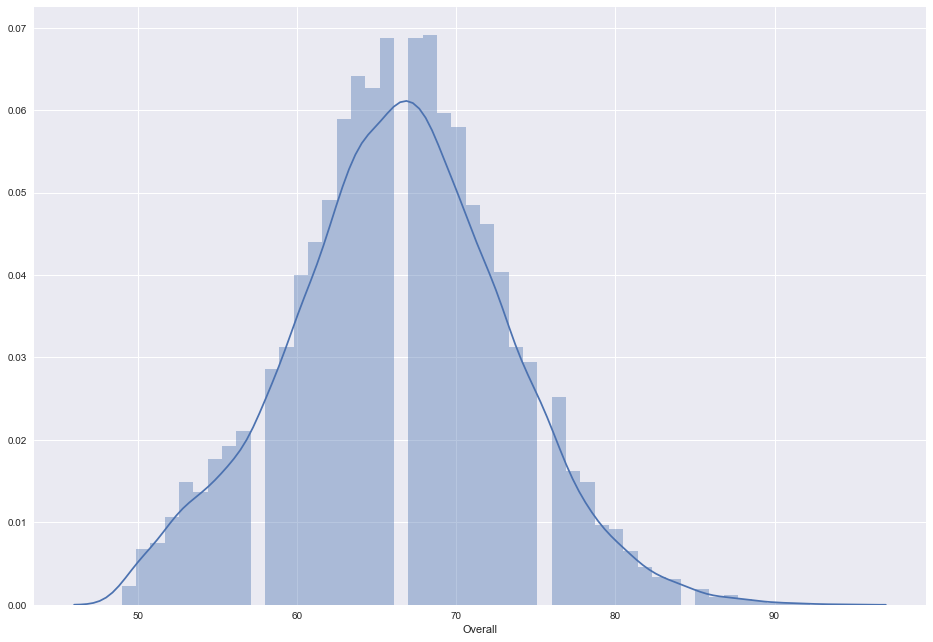

In [27]:
plotDistribution('Overall')

Overall is almost normally distributed with a small gap in between.

F:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



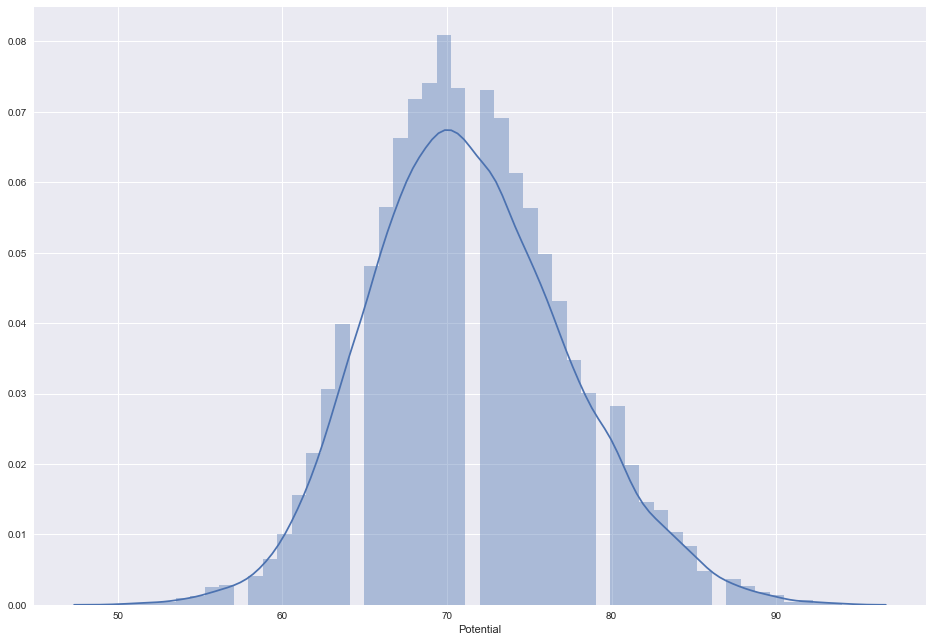

In [28]:
plotDistribution('Potential')

Potential is almost normally distributed with a small gap in between.

F:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



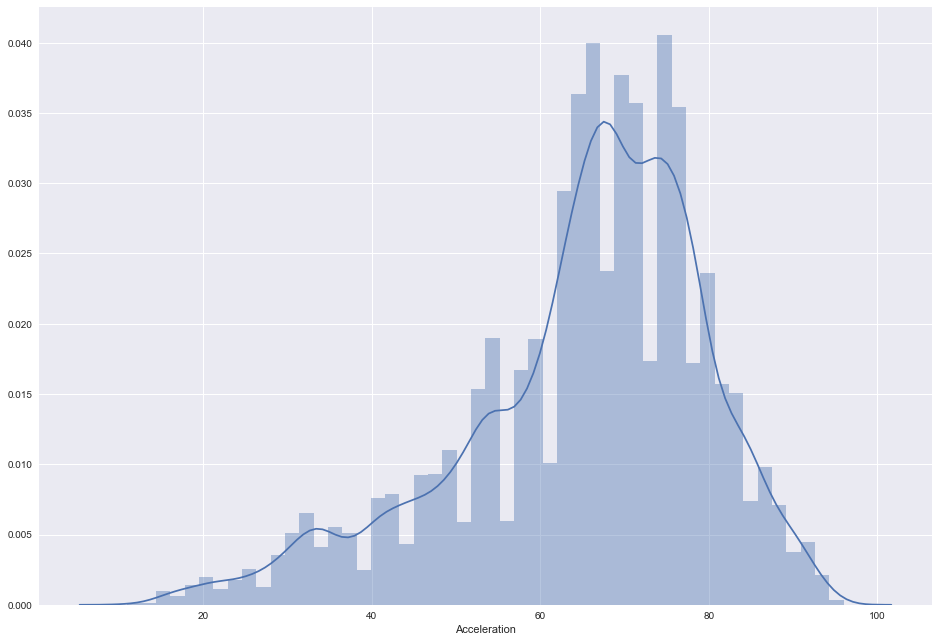

In [29]:
plotDistribution('Acceleration')

Plot reveals that Acceleration is not normally distributed and it is slightly right skewed. 

F:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



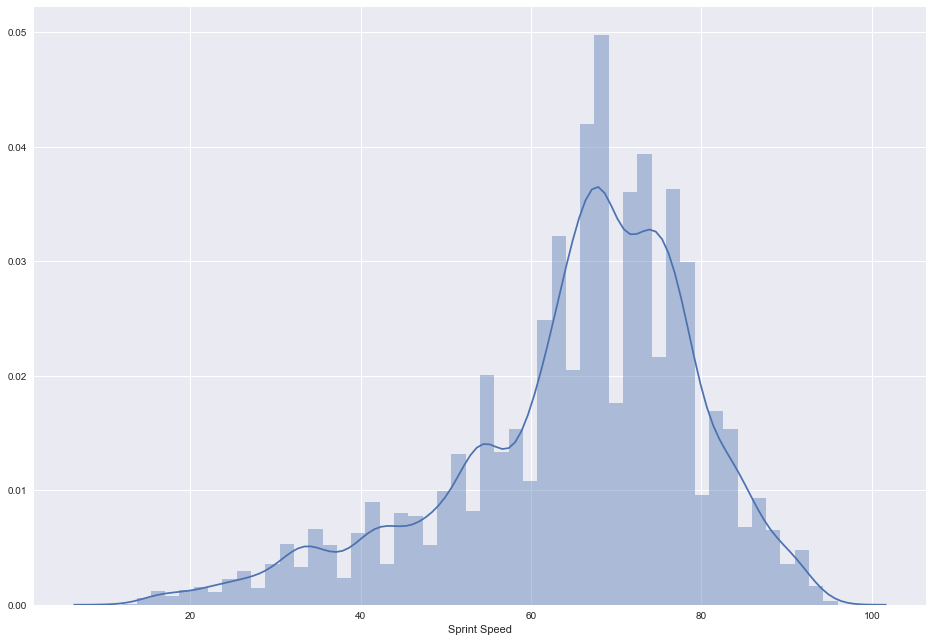

In [30]:
plotDistribution('Sprint Speed')

Plot reveals that Acceleration is not normally distributed and it is slightly right skewed. 

## Are there any Anomalies/outliers?

Here I am plotting boxplots of top 30 clubs and their transfer value & wage structure. We can see outliers in terms of wages in few clubs. These players are exceptional and have a very high overall as compared to other players in FIFA-18.

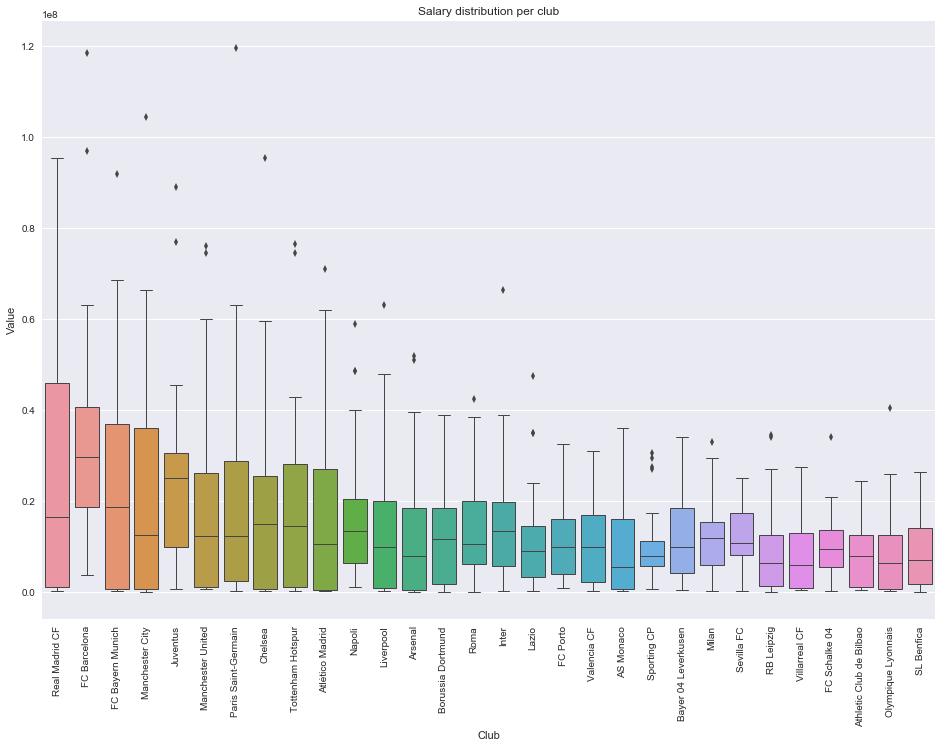

In [31]:
def plotBoxPlot(colName):
    sns.mpl.rc("figure", figsize=(16,11))
    grouped = full_data.groupby('Club')
    wages = grouped.sum()[colName].sort_values(ascending = False)

    #top 30 clubs column wise
    top30 = wages.iloc[0:30].index
    df_top30 = full_data[full_data['Club'].isin(top30)]

    ax = sns.boxplot(x = 'Club', 
                     y = colName, 
                     data = df_top30, 
                     order = top30,
                     linewidth = 1
                    )
    ax.set_xticklabels(labels = top30, rotation='vertical')
    ax.set_ylabel(colName)
    ax.set_xlabel('Club')
    ax.set_title('Salary distribution per club')

plotBoxPlot('Value')

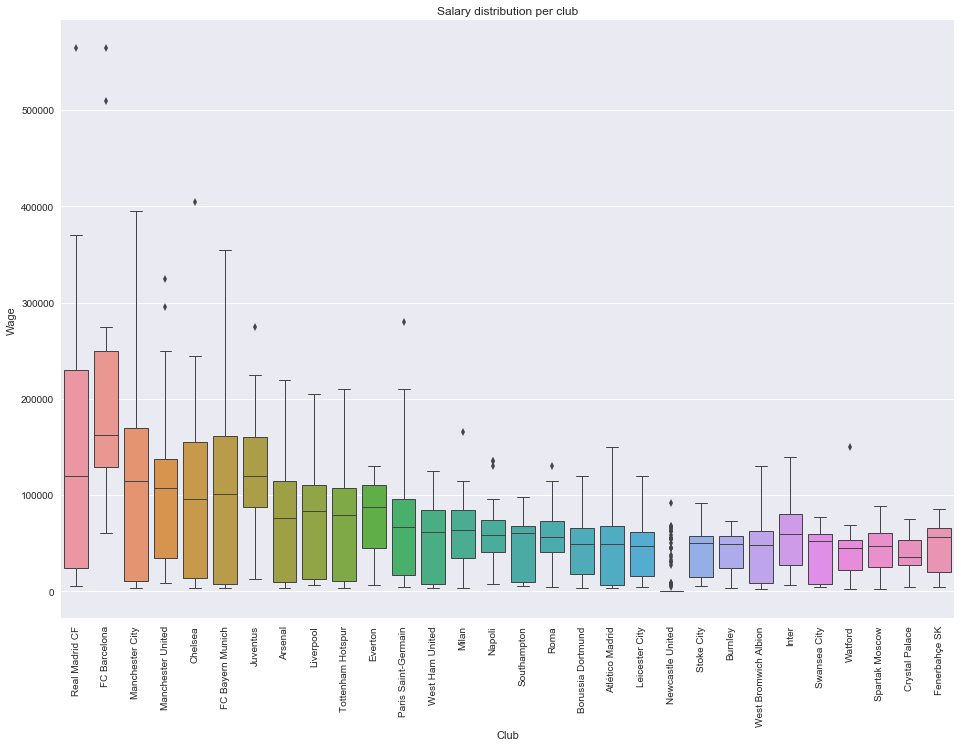

In [32]:
plotBoxPlot('Wage')

## Average Age of players that represent top clubs

In [33]:
df_SquadAge = full_data.groupby('Club').mean().sort_values(by="Overall",ascending=False).reset_index()
df_SquadAge = df_SquadAge[["Club","Age","Overall","Potential"]].head(10)

Text(0,0.5,'Average Age')

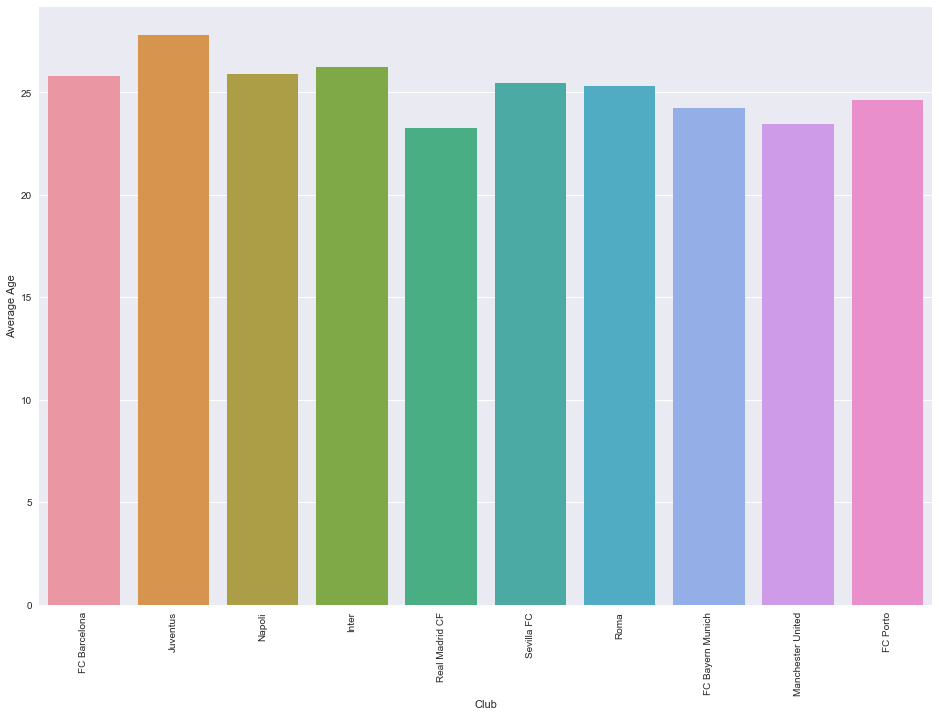

In [34]:
s = sns.barplot(df_SquadAge["Club"],df_SquadAge["Age"])
mat.xticks(rotation=90)
s.set_ylabel('Average Age')

No Surprises here, Average age of juventus is higher then other clubs, average age of club approximately 28 is alarming.

In [35]:
df_WagePrediction = full_data[["Value","Wage", "Age", "Overall","Potential",'Acceleration', 'Aggression', 'Agility', 'Balance',
                               'Ball Control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'FK Accuracy', 'Finishing',
                               'Long Passing', 'Long Shots', 'Marking', 'Penalties', 'Positioning',
                               'Reactions', 'Short Passing', 'Shot Power', 'Sprint Speed', 'Stamina', 'Strength', 'Vision']]

## Are any of the columns correlated?

Here, I am taking columns for regression for prediction of value based on wages and other attributes and abilities. First, I am analyzing all the columns for finding out the correlation between them.

In [36]:
column = [col for col in df_WagePrediction.columns]

for i in column:
    df_WagePrediction[i] = df_WagePrediction[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



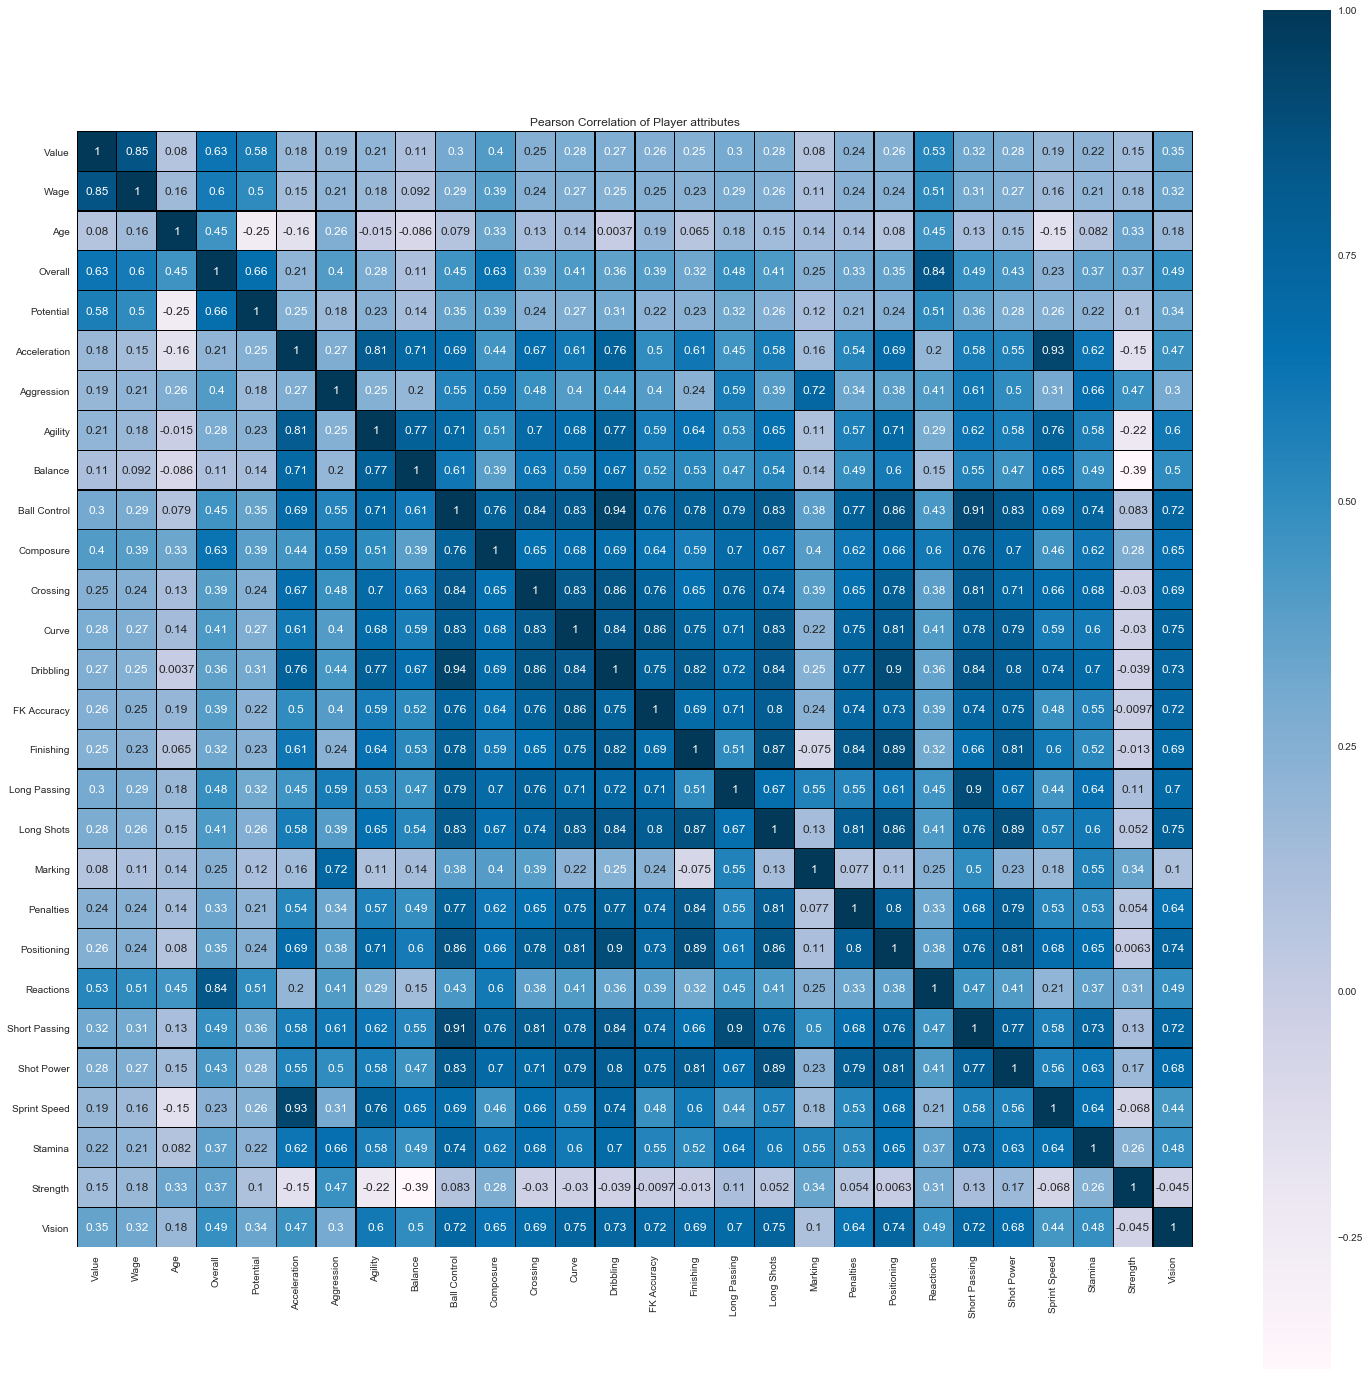

In [123]:
f, ax = mat.subplots(figsize=(25, 25))
mat.title('Pearson Correlation of Player attributes')
sns.heatmap(df_WagePrediction.corr(),linewidths=0.25,vmax=1.0, square=True, cmap = 'PuBu', linecolor='black', annot=True)

**This was totally unexpected result, the heatmap shows that no particular ability is strongly related with wages 
and value of a player. Only overall rating is somewhat strongly related with both of them which was kind of expected. 
Dribbling and ball control shows a very strong relationship. Same goes with Acceleration and sprint speed. Also short passing and ball control have a strong relationship**

## Age Distribution

Below plot shows that maximum players in FIFA-18 are of 25 years of age

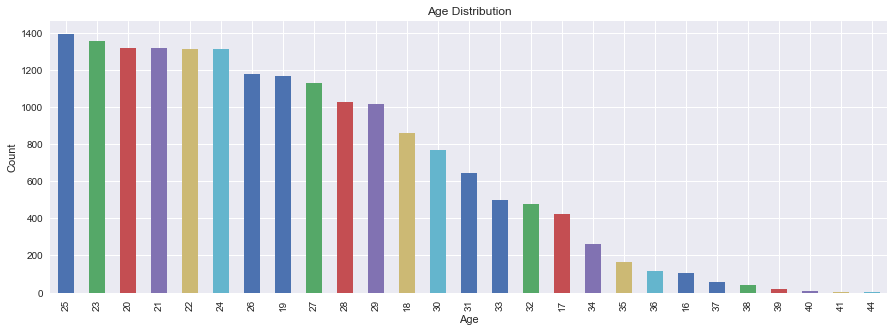

In [37]:
mat.title('Age Distribution')
mat.xlabel('Age')
mat.ylabel('Count')
full_data['Age'].value_counts().plot.bar(figsize= (15,5))

Below are the plots of most valuable 20 players in FIFA-18 and the 20 highest paid players

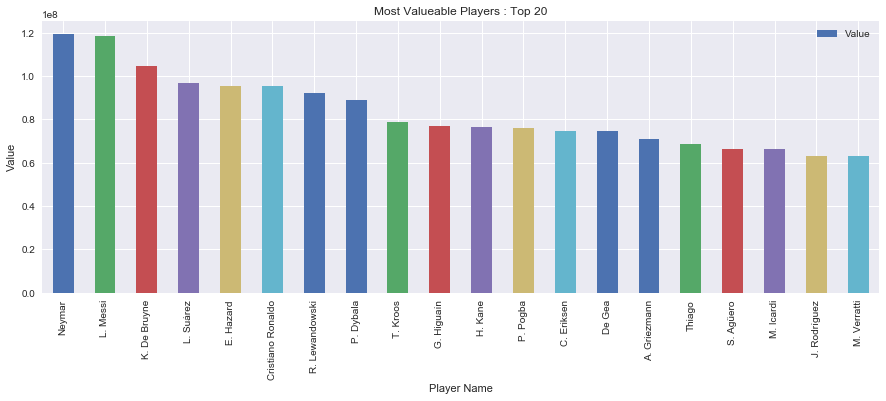

In [38]:
sorted_data = full_data.sort_values(by= 'Value', ascending= False).head(20)[['Name','Value']]
sorted_data.plot.bar(x= 'Name', y= 'Value', figsize= (15,5))
mat.title("Most Valueable Players : Top 20")
mat.xlabel("Player Name")
mat.ylabel("Value")
mat.plot();

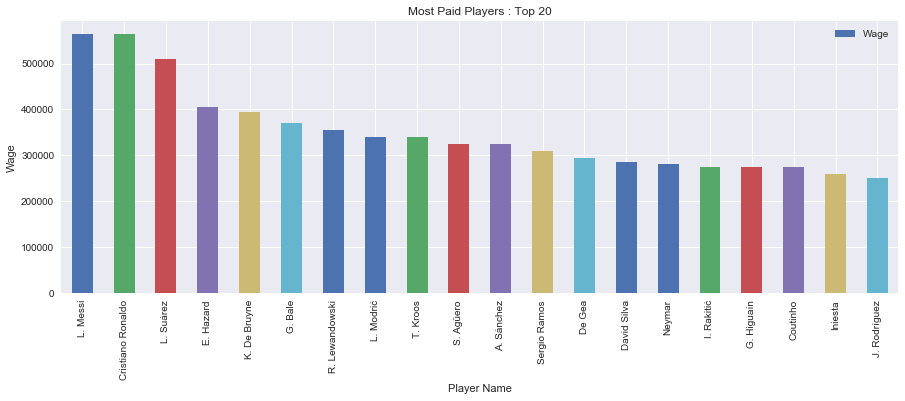

In [39]:
sorted_data = full_data.sort_values(by= 'Wage', ascending= False).head(20)[['Name','Wage']]
sorted_data.plot.bar(x= 'Name', y= 'Wage', figsize= (15,5))
mat.title("Most Paid Players : Top 20")
mat.xlabel("Player Name")
mat.ylabel("Wage")
mat.plot();

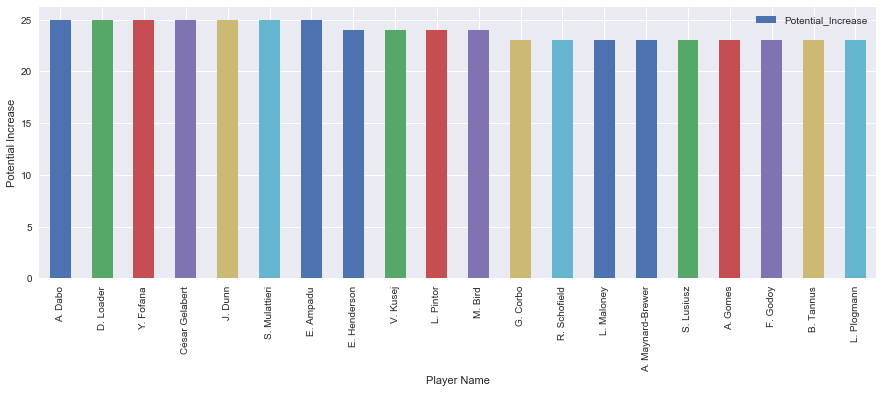

In [40]:
temp_data = full_data.copy()
temp_data['Potential_Increase'] = temp_data['Potential'] - temp_data['Overall']
temp_data.sort_values(by= 'Potential_Increase', ascending= False).head(20)[['Name','Potential_Increase']].plot.bar(x= 'Name', y= 'Potential_Increase', figsize=(15,5))
mat.xlabel('Player Name')
mat.ylabel('Potential Increase')
mat.show();

The plot above shows that the player A Dabo along with 6 others have the highest potential to increase their overall ratings

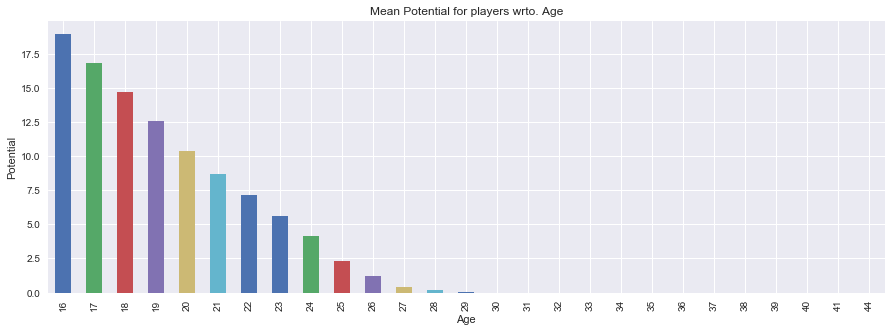

In [41]:
temp_data.groupby('Age')['Potential_Increase'].mean().plot.bar(figsize=(15,5))
mat.xlabel('Age')
mat.ylabel('Potential')
mat.title('Mean Potential for players wrto. Age')
mat.show();

The above plot suggests that the younger players have the highest potential to increase their overall ratings. Also, once the age of a player reaches 30, there is no gap between its potential and overall rating

## Regression

### Plotting the Regression Line

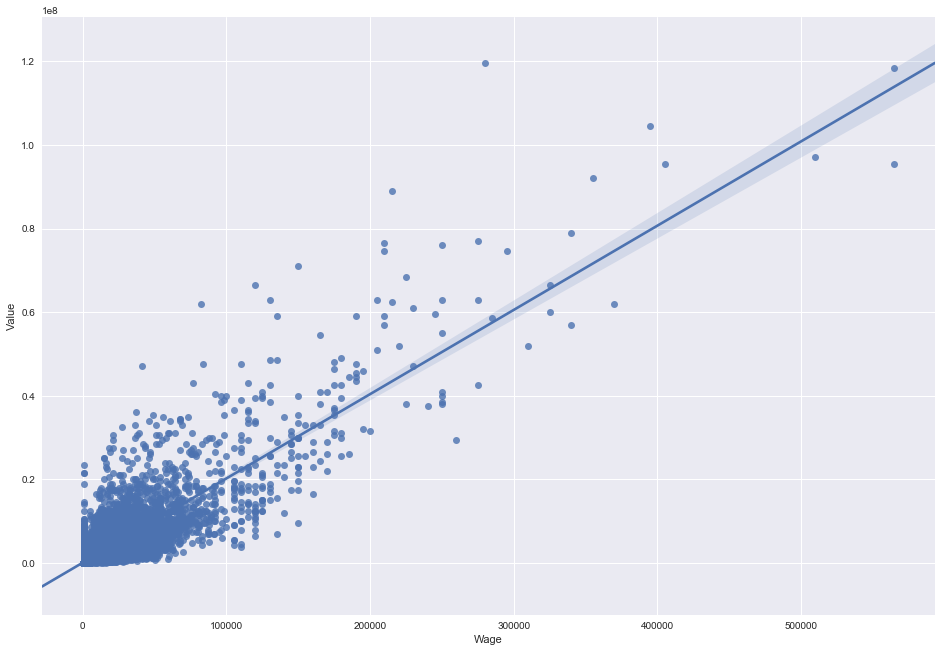

In [42]:
sns.regplot(x=full_data["Wage"],y=full_data["Value"])

**Since only Wage and Overall had decent enough correlation with Value, we will use these 2 features to predict the Value of the player**

In [43]:
x = df_WagePrediction[["Wage","Overall"]]
y = df_WagePrediction[["Value"]]
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [44]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 2.265e+04
Date:                Fri, 21 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:59:09   Log-Likelihood:            -2.2031e+05
No. Observations:               13500   AIC:                         4.406e+05
Df Residuals:                   13498   BIC:                         4.406e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wage         201.9800      1.109    182.108      0.000     199.806     204.154
Overall     2184.0968    439.865      4.965      0.000    1321.899    3046.295
==============================================================================
Omnibus:                    12411.624   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1479681.312
Skew:                           4.007   Prob(JB):                         0.00
Kurtosis:                      53.659   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We get an R-Squared of 0.77 which is quite good as our model can explain 77% of variance. AIC and BIC is quite high which is bad for the model. T- stat is singnificantly lower which is a good sign.**

In [45]:
pred = model.predict(x_test)
pred

1469     3.195692e+06
9642     5.481104e+05
2107     3.636032e+05
17031    3.221053e+05
9349     1.154050e+06
4999     2.172687e+06
13370    5.393740e+05
9832     7.500904e+05
7972     7.522745e+05
8220     7.522745e+05
13562    9.433341e+05
16079    3.286576e+05
13376    9.433341e+05
11907    1.351662e+06
17081    5.240854e+05
1829     7.233108e+06
17964    3.090008e+05
548      1.067550e+07
5868     4.594263e+06
14359    3.352099e+05
4330     2.780811e+06
5620     9.608068e+05
10618    7.479063e+05
17898    3.111849e+05
15954    3.286576e+05
17935    3.111849e+05
7733     4.390099e+06
12275    1.349478e+06
14287    9.411500e+05
4747     2.376851e+06
             ...     
8227     1.358215e+06
14030    3.352099e+05
10331    1.757806e+06
17266    5.219013e+05
5412     1.970707e+06
13835    1.143130e+06
3993     8.840211e+06
2440     3.191323e+06
17318    3.177371e+05
4688     4.396651e+06
10427    5.459263e+05
1094     8.853316e+06
6887     1.360399e+06
13488    1.751254e+06
2002     1

**Below are the methods written for determining summary metrics after analysis and plotting graphs of Actual values vs Predicted values**

In [49]:
def determineAnalysis(true, pred, regressor): 
    mae = mean_absolute_error(true, pred)
    rmse = sqrt(mean_squared_error(true, pred))
    r2 = r2_score(true, pred)
    true, pred = np.array(true), np.array(pred)
    print('Mean absolute error is ',mae)
    print('Root mean squared error is ',rmse)
    print('RSquare is ',r2)

In [47]:
def plotActual(pred, y_train):
    mat.scatter(pred, y_train)
    mat.xlabel("Predicted Y")
    mat.ylabel("Actual Y")
    mat.title("Predicted vs Actual plot")
    mat.show()
    

def plot_trend(predict, y, title):
    mat.xticks(rotation=45)
    mat.plot(y.as_matrix(), color='b', marker='o', linestyle='dashed',linewidth=1, markersize=2)
    mat.plot(predict, color='g', marker='o', linestyle='dashed',linewidth=1, markersize=2)
    mat.legend(loc='upper right')
    mat.ylabel('Value')
    mat.title(title)
    mat.grid()
    mat.show()

### Random Forest Regression

In [56]:
regressor = RandomForestRegressor(n_estimators=200, n_jobs=2)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
acc = regressor.score(x_test, y_test)
determineAnalysis(y_test, pred, regressor)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Mean absolute error is  572297.6832162542
Root mean squared error is  1593957.8633551432
RSquare is  0.9016364617794119


**Random Forest Regression gave 90% accuracy which is also evident from the plots below where the predicted values are very near to the actual values of the Transfer Value of each player**

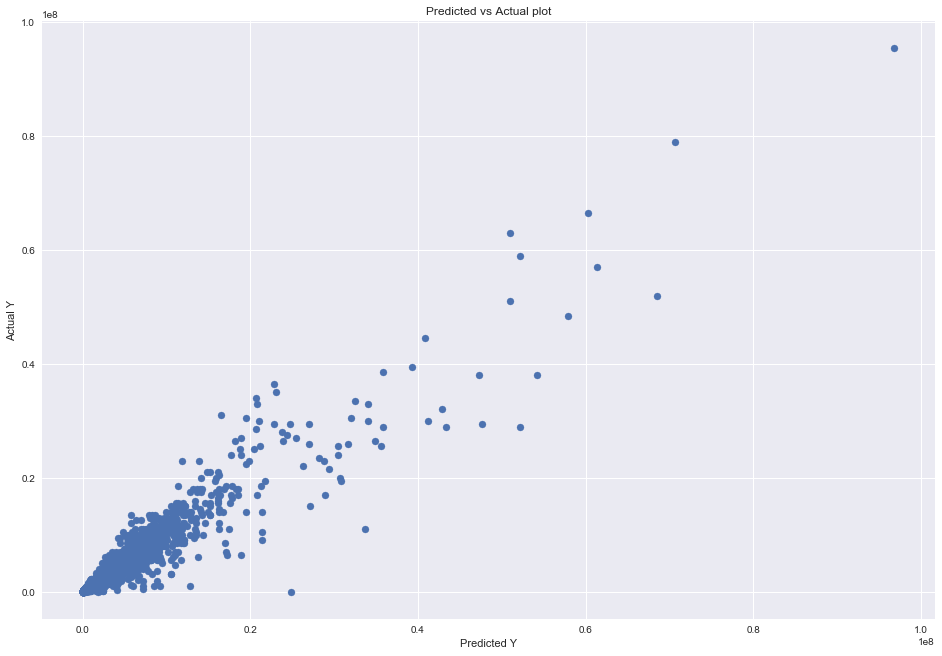

In [51]:
plotActual(pred, y_test)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

No handles with labels found to put in legend.


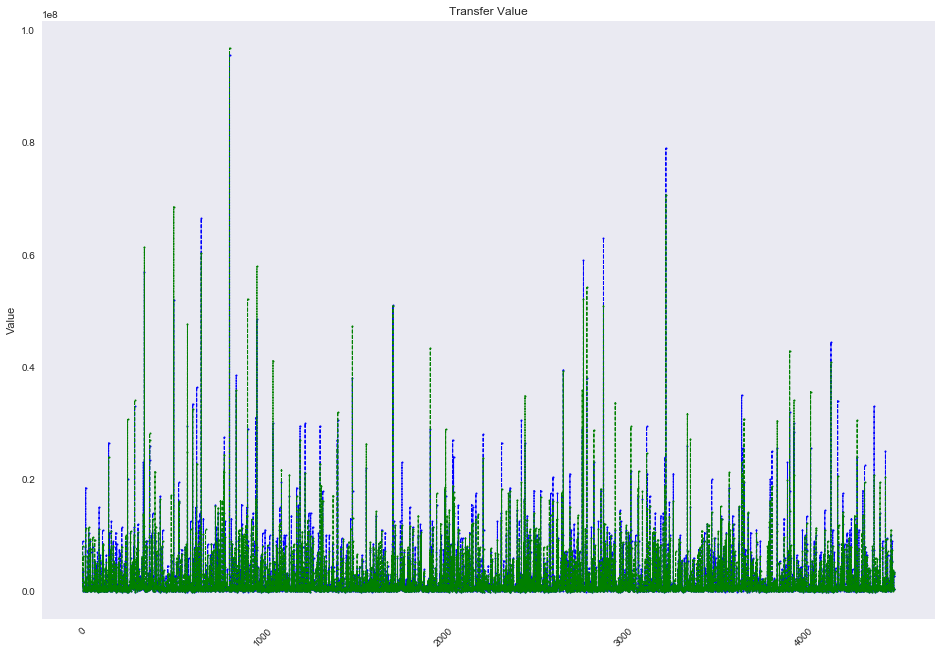

In [52]:
plot_trend(pred, y_test, "Transfer Value")

### Multilayer Perceptron Regression

In [57]:
mlp = MLPRegressor(hidden_layer_sizes=(50,25,25,25,10,5),max_iter=1000)
mlp.fit(x_train,y_train)
pred = mlp.predict(x_test)
acc = mlp.score(x_test, y_test)
determineAnalysis(y_test, pred, mlp)

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean absolute error is  1211714.988739035
Root mean squared error is  2662970.926639008
RSquare is  0.7254551387993791


**MLP Regression gave 72.5% accuracy which is also evident from the plots below where the predicted values are not much near to the actual values of the Transfer Value of each player. Probably changing the number of hidden layers and the neurons in each layer might provide with better accuracy. Will test this in grid search later**

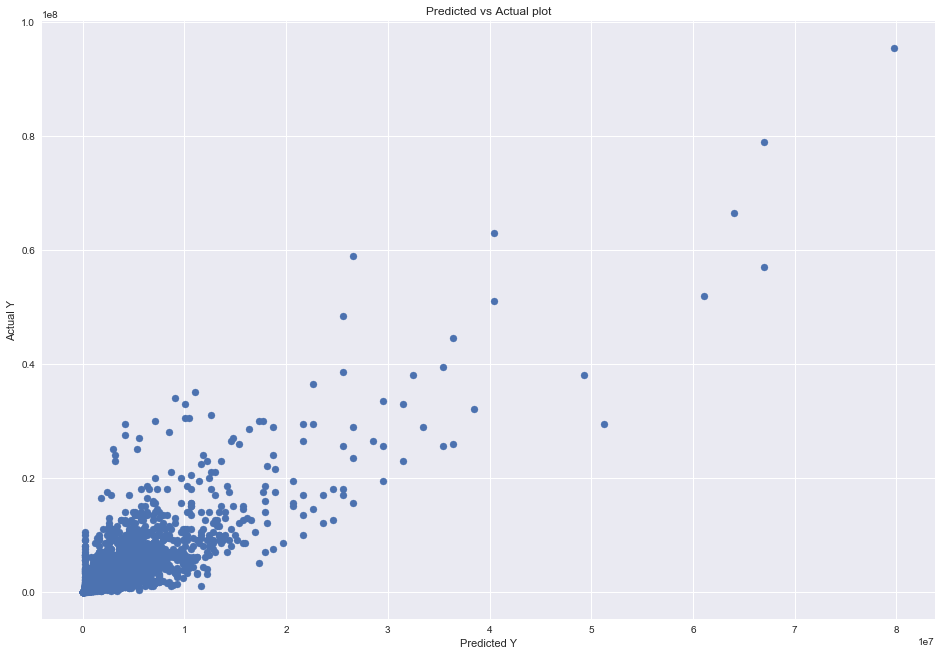

In [58]:
plotActual(pred, y_test)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

No handles with labels found to put in legend.


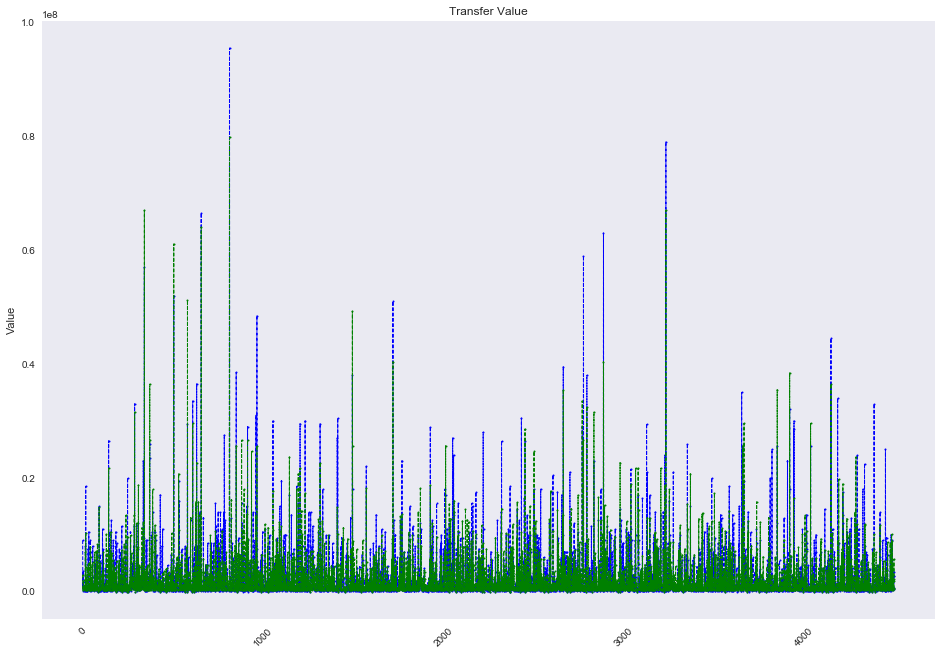

In [59]:
plot_trend(pred, y_test, "Transfer Value")

### Gradient Boosting Machine

In [60]:
est = GradientBoostingRegressor(n_estimators=1500,max_depth=5).fit(x_train, y_train)
pred = est.predict(x_test)
acc = est.score(x_test, y_test)
determineAnalysis(y_test, pred, est)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean absolute error is  587512.7948391809
Root mean squared error is  1684870.1613805501
RSquare is  0.8900960383613029


**Gradient Boosting Regression gave 89% accuracy which is also evident from the plots below where the predicted values are very near to the actual values of the Transfer Value of each player**

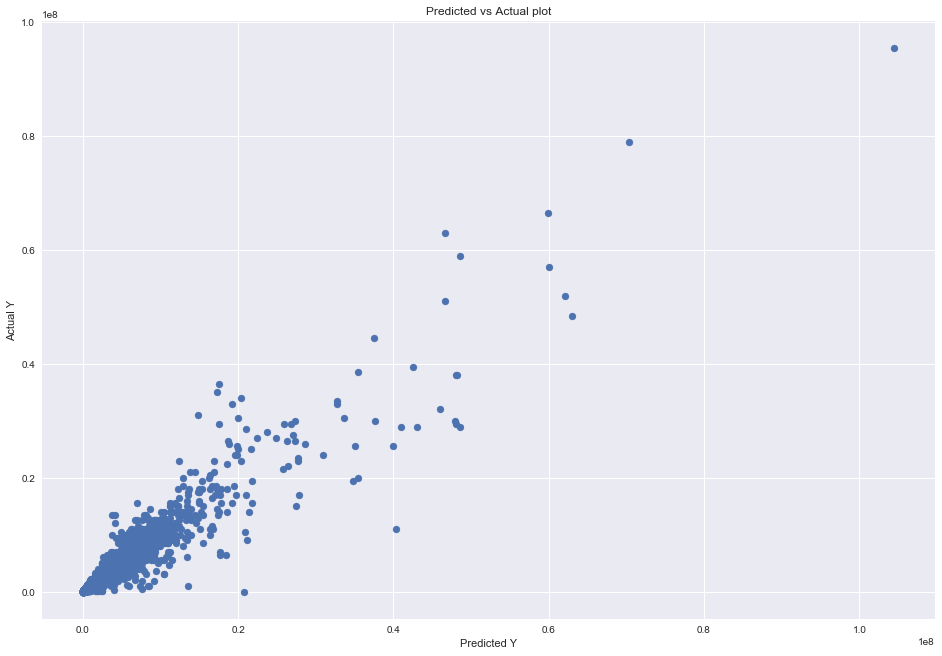

In [61]:
plotActual(pred, y_test)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

No handles with labels found to put in legend.


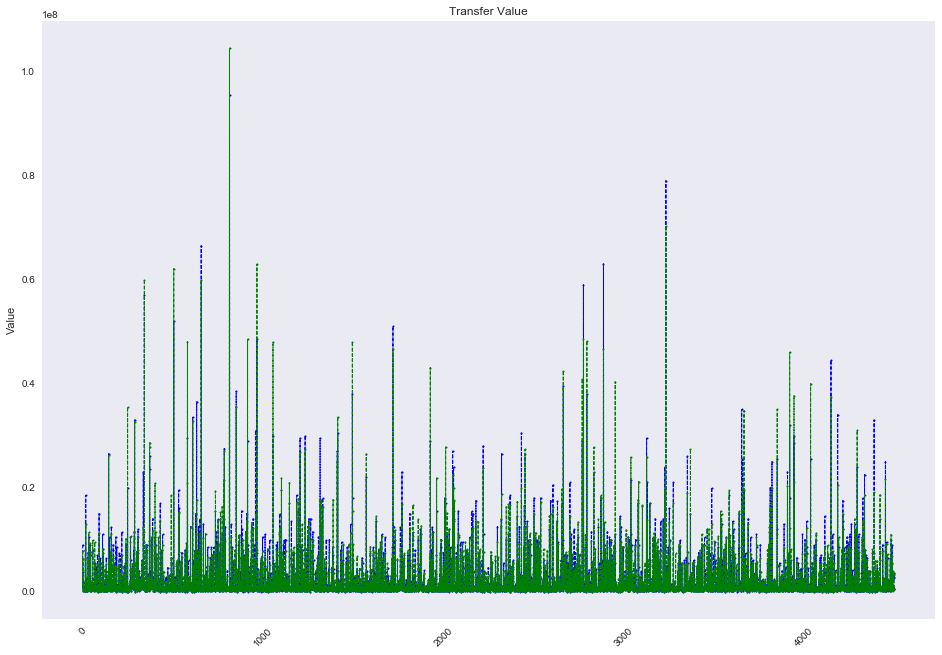

In [62]:
plot_trend(pred, y_test, 'Transfer Value')

## Hyperparameter tuning using Grid Search

### Random Forest Estimator

Here, i will try 3 different values of the 2 main parameters of the Random Forest API:
- No of Estimators: 100, 200 & 300
- Maximum tree Depth: 4, 5, 6

In [67]:
rf = RandomForestRegressor()
param_grid = {"n_estimators" : [100,200,300], "max_depth" : [4,5,6]}
grid = GridSearchCV(rf,param_grid,cv=10)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning:

A column-vector y was passed

0.9007854908600179
{'max_depth': 5, 'n_estimators': 200}


**Grid search finalizes that 200 estimators and maximum tree depth of 5 gives the highest accuracy of 90%**

### Gradient Boosting Estimator

Here, i will try 3 different values of the 2 main parameters of the Gradient Boosting API:
- No of Estimators: 1000, 1500 & 2000
- Maximum tree Depth: 5, 10, 20

In [68]:
est = GradientBoostingRegressor()
param_grid = {"n_estimators" : [1000,1500,2000], "max_depth" : [5,10,20]}
grid = GridSearchCV(est,param_grid,cv=10)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed 

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed 

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed 

0.8631512436278967
{'max_depth': 5, 'n_estimators': 1500}


**Grid search finalizes that 1500 estimators and maximum tree depth of 5 gives the highest accuracy of 86.31%**

### MLP Estimator

Here, i will try 3 different values of the 2 main parameters of the MLP API:
- Hidden Layer Size: (100,50,50,20,10), (100,50,25,10), (50,25,10)
- Maximum Iterations: 1000, 1500, 2000

In [69]:
mlp = MLPRegressor()
param_grid = {"hidden_layer_sizes" : [(100,50,50,20,10), (100,50,25,10), (50,25,10)], "max_iter" : [1000,1500,2000]}
grid = GridSearchCV(mlp,param_grid,cv=10)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sk

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sk

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

F:\anaconda\lib\site-packages\sk

0.719790624111302
{'hidden_layer_sizes': (100, 50, 25, 10), 'max_iter': 2000}


**Grid search finalizes that hidden layers (100, 50, 25, 10) and maximum iterations of 2000 gives the highest accuracy of 71.98%**

# Summary

### Random Forest Accuracy - 90.16%
### MLP Regressor Accuracy - 72.54%
### Gradient Boosting Accuracy - 89.01%

## Hence we select Random Forest Algorithm for the Player Value prediction